In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pylab
import scipy.stats as st

# DATA READING

In [2]:
df=pd.read_csv("C:\\Users\\Neeraj\\Downloads\\Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
df.shape

(6362620, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe(include ="all")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

# DATA CLEANING AND VISUALIZATION

In [8]:
df.isna().sum()                               #no null values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df.isFraud.value_counts()/df.shape[0]     # 99.8% are not fraud while 0.1% are fraud

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

In [10]:
df["isFraud"].value_counts()             # Data is highly imbalanced. 

0    6354407
1       8213
Name: isFraud, dtype: int64

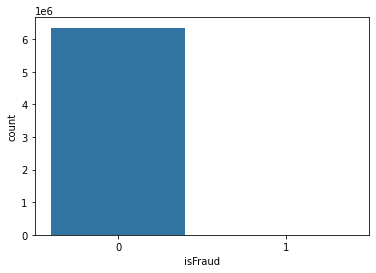

In [12]:
import warnings
warnings .filterwarnings("ignore")
sns.countplot(df["isFraud"]);            

In [13]:
df.groupby("isFraud")["type"].value_counts() #fraud are done only in cashout and transfer type

isFraud  type    
0        CASH_OUT    2233384
         PAYMENT     2151495
         CASH_IN     1399284
         TRANSFER     528812
         DEBIT         41432
1        CASH_OUT       4116
         TRANSFER       4097
Name: type, dtype: int64

In [14]:
df["type"].value_counts()                   #cashout type of transaction  is done maximum times

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

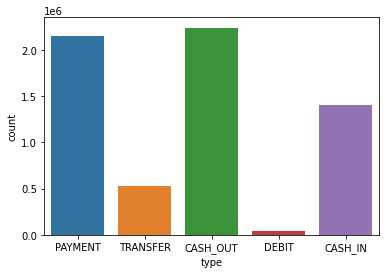

In [15]:
sns.countplot(df["type"]); 

In [17]:
df1=df[df["isFraud"]==1]             #only fraud data.
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [56]:
df1["type"].value_counts()      #proportion of cashout and transfer in fraud is almost same

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [18]:
df1['newbalanceOrig'].value_counts()

0.00           8053
17316255.05       3
10399045.08       3
19585040.37       3
4953893.08        2
               ... 
34892193.09       1
1975271.77        1
11975271.77       1
1653144.10        1
29585040.37       1
Name: newbalanceOrig, Length: 145, dtype: int64

In [19]:
(df1['newbalanceOrig'].value_counts()[0]/df1.shape[0])*100   #98.05 % 0f frauds transaction new balance become 0

98.05186898818945

In [21]:
df1.nunique()               #no. of values in respect columns

step               741
type                 2
amount            3977
nameOrig          8213
oldbalanceOrg     4094
newbalanceOrig     145
nameDest          8169
oldbalanceDest    2863
newbalanceDest    4067
isFraud              1
isFlaggedFraud       2
dtype: int64

<AxesSubplot:>

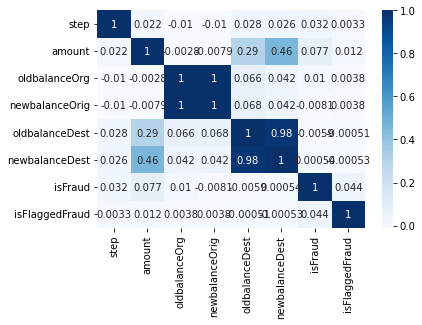

In [22]:
sns.heatmap(df.corr(),annot=True,cmap="Blues")  #checking correlation and you can see multicolinearity here which is bad for our prediction

In [23]:
df.drop(columns=['nameOrig','nameDest','isFlaggedFraud','oldbalanceOrg','newbalanceDest'],inplace=True)

In [24]:
#high co relation between old balance and new balance
#there is multicolinearity therefore droping old balance and new balance and also droping irrelavent columns.

In [25]:
df =pd.get_dummies(df,columns=['type'])       # for classification

<AxesSubplot:>

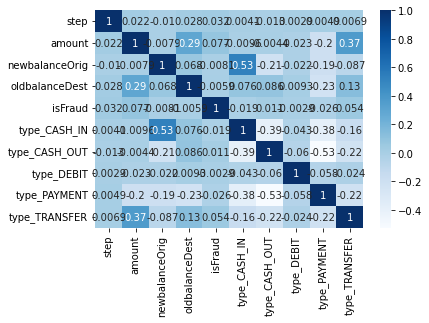

In [26]:
sns.heatmap(df.corr(),annot=True,cmap="Blues")

In [27]:
x=df.drop(columns=["isFraud"])       # classifying dependent(y) and independent(x)variables
y=df["isFraud"]

# LOGISTIC REGRESSION MODEL

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

TRAINING AND TESTING OF DATA

In [30]:
from sklearn.model_selection import train_test_split           

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.10,random_state=123)

MODEL FITTING

In [32]:
from sklearn.linear_model import LogisticRegression            

In [33]:
reg=LogisticRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)


# PERFORMANCE METRICS

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,recall_score,precision_score

In [35]:
confusion_matrix(y_test,y_pred)

array([[635470,      3],
       [   783,      6]], dtype=int64)

In [36]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Accuracy: 0.9987646598413861
Precision: 0.6666666666666666
Recall: 0.0076045627376425855


In [37]:
z=classification_report(y_test,y_pred)
print(z)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635473
           1       0.67      0.01      0.02       789

    accuracy                           1.00    636262
   macro avg       0.83      0.50      0.51    636262
weighted avg       1.00      1.00      1.00    636262



# OVERSAMPLING(smote)

In [57]:
#because data is highly imbalanced ,reacall is very low therefore we use SMOTE

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
ovr=SMOTE()
x_smote,y_smote=ovr.fit_resample(x,y)

LOGISTIC REGRESSION

In [41]:
# Logistic Regression on SMOTEED data.

In [42]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_smote,y_smote,test_size=0.10,random_state=123)

In [43]:
logreg=LogisticRegression()
logreg.fit(x_train1,y_train1)
y_pred1=logreg.predict(x_test1)

In [44]:
print("Accuracy:",accuracy_score(y_test1, y_pred1))
print("Precision:",precision_score(y_test1, y_pred1))
print("Recall:",recall_score(y_test1, y_pred1))

Accuracy: 0.6844703127434333
Precision: 0.6256350329841234
Recall: 0.9173994049897078


# RANDOM FOREST

In [45]:
#recall is good but accuracy got down so we will use random forest 
# Outliers have no affect on Decision tree models, therefore i'll be using non-scaled data.

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=123)

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc=RandomForestClassifier()

In [51]:
rfc.fit(x_train1,y_train1)

RandomForestClassifier()

In [53]:
y_pred=rfc.predict(x_test1)

In [55]:
print("Accuracy:",accuracy_score(y_test1, y_pred))
print("Precision:",precision_score(y_test1, y_pred))
print("Recall:",recall_score(y_test1, y_pred))

Accuracy: 0.9905136747550126
Precision: 0.9861846326283072
Recall: 0.9949507596697047


# ANSWERS

questions.
1. Data cleaning including missing values, outliers and multi-collinearity.
ans1 there are no missing(NAN) values but data have outliers and have multi_collinearity too, to reduce outliers i am using normalization i.e minmaxscaler and the columns which have multi-collinearity i removed which are irrelevant for the pediction.


2. Describe your fraud detection model in elaboration.
ans2 i have done some data visualization first and then applied logistic regression model, this fraud detection model have accuracy of 99% but as it is a fraud detection model here recall is more important so i have used oversampling techinque (SMOTE) because of the imbalance in data. Because it is a fraud detection data it is usually imbalanced,but the accuracy went down so i have to use random forest. And at last the model is able to give accuracy of 99% as well as recall of 99% too.


3. How did you select variables to be included in the model?
ans3 the variables which are irrelevant for the prediction and have multicolinearity i have removed them.and the rest of variables are taken in the model



4. Demonstrate the performance of the model by using best set of tools.
ans4 accuracy_score,classification_report,recall_score,precision_score 

     Accuracy: 0.9905136747550126
     Precision: 0.9861846326283072
     Recall: 0.9949507596697047

5. What are the key factors that predict fraudulent customer?
ans5 from visualization the key factors were type of payment and new balance  of transactions.
     a.all the fraud transactions are in cashout and transfer only.
     b.about 98% of fraud transaction new balance become 0.
     

6. Do these factors make sense? If yes, How? If not, How not?
ans6 yes, these factors make sense because in a rare case only a fraud leave some money in a account and he/she never do a payment type of transaction.


7. What kind of prevention should be adopted while company update its infrastructure?
ans7 if the new balance become 0 , they shoud ask from a otp or message first and should make cashout and transfer more secure.



8. Assuming these actions have been implemented, how would you determine if they work?
ans8 the number of fraud cases will decrease.